In [1]:
exec(open("init_notebook.py").read())
%load_ext autoreload
%autoreload 2

current working dirC:\muktadir\pyns


In [2]:
np.random.seed(39)
logfile = "2-client-debug.log"
with open(logfile, 'w') as f:
    f.truncate()
logging.basicConfig(level=logging.DEBUG, filename=logfile)
print(f"Logging file at: {logfile}")

config = Configuration()
timeResolutionUnit = config.get('timeResolutionUnit')
network = Network.get()
nodeManager = NodeManager(timeResolutionUnit)
analyzer = AnalyzerTools()

Logging file at: 2-client-debug.log


In [3]:

clientManager = ClientManager(timeResolutionUnit, debug=True)
client = clientManager.createTCPClient(deliveryRatePerS=1000, max_outstanding_packets=100)
client2 = clientManager.createPowerTWClient(pollCycle=2,rttWindowSize=5, bandWidthWindowSize=5, deliveryRatePerS=1500, max_outstanding_packets=1, startAt=250000 )
client3 = clientManager.createTCPClient(deliveryRatePerS=500, max_outstanding_packets=100, startAt=2000000)


In [4]:
nodes = [
    nodeManager.createSimpleNode(maxDeliveryRate=10000, debug=False),
    nodeManager.createSimpleNode(maxDeliveryRate=2000, debug=False),
    nodeManager.createSimpleNode(maxDeliveryRate=5000, debug=False),
    nodeManager.createSimpleNode(maxDeliveryRate=3000, debug=False)
]
nodes2 = [
    nodeManager.createSimpleNode(maxDeliveryRate=1500, debug=False),
    nodeManager.createSimpleNode(maxDeliveryRate=5000, debug=False),
    nodes[1],
    nodeManager.createSimpleNode(maxDeliveryRate=5000, debug=False),
    nodeManager.createSimpleNode(maxDeliveryRate=5000, debug=False),
    nodeManager.createSimpleNode(maxDeliveryRate=1500, debug=False),
    nodeManager.createSimpleNode(maxDeliveryRate=5000, debug=False)
]

nodes3 = [
    nodeManager.createSimpleNode(maxDeliveryRate=10000, debug=False),
    nodes2[5]
]
server = Server(-1)
server2 = Server(-2)
server3 = Server(-3)

path = network.createPath(client=client, nodes=nodes, server=server)
path2 = network.createPath(client=client2, nodes=nodes2, server=server2)
path3 = network.createPath(client=client3, nodes=nodes3, server=server3)

In [5]:
logging.info("path for client1:" + str([node.id for node in path.getNodesWithServer()]))
logging.info("path for client2:" + str([node.id for node in path2.getNodesWithServer()]))
print("path for client1:" + str([node.id for node in path.getNodesWithServer()]))
print("path for client2:" + str([node.id for node in path2.getNodesWithServer()]))
logging.info("path for client3:" + str([node.id for node in path3.getNodesWithServer()]))
print("path for client3:" + str([node.id for node in path3.getNodesWithServer()]))

path for client1:[1, 2, 3, 4, -1]
path for client2:[5, 6, 2, 7, 8, 9, 10, -2]
path for client3:[11, 9, -3]


In [6]:
# nodeManager.reset()
# simulator = EventSimulator(timeResolutionUnit=timeResolutionUnit, nodeManager=nodeManager, debug=True)
# simulator.addClient(client)
# maxSteps = 100000 # equivalent to maxStep timeResolution unit
# simulator.run(maxSteps)
# # client 1 stats
# # analyzer.createPlotsForTimeSteps(client.stats, ['outStandingPackets', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'rttMS'])
# analyzer.createPlotsForTimeSteps(client.stats, ['outStandingPackets', 'packetsAcked', 'rttMS'])
# analyzer.createPlotsForTimeSteps(client.stats, ['bottleNeck', 'dataInFlight', 'dataInQueue', 'rttMS'])

# analyzer.binStats(nodes, columnNames= ['qSize', 'utilization'], binSize=500, method=np.max)
# analyzer.binStats([client], columnNames= ['outStandingPackets', 'rttMS'], binSize=500, method=np.max)
# analyzer.createBinnedChartForNodeVsClient(nodes, ['qSize'], [client], ['outStandingPackets', 'rttMS'])

In [7]:
nodeManager.reset()
simulator = EventSimulator(timeResolutionUnit=timeResolutionUnit, nodeManager=nodeManager, debug=False)
simulator.addClient(client)
simulator.addClient(client2)
simulator.addClient(client3)

maxSteps = 5000000 # equivalent to maxStep timeResolution unit
simulator.run(maxSteps)
# client 1 stats
# analyzer.createPlotsForTimeSteps(client.stats, ['outStandingPackets', 'packetsAcked', 'rttMS'], title=f"{client.name} stats")
# analyzer.createPlotsForTimeSteps(client.stats, ['outStandingPackets', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'rttMS'], title=f"{client.name} stats")
# analyzer.createPlotsForTimeSteps(client.stats, ['bottleNeck', 'dataInFlight', 'dataInQueue', 'rttMS'], title=f"{client.name}")
# # client 2 stats
# # analyzer.createPlotsForTimeSteps(client2.stats, ['outStandingPackets', 'packetsAcked', 'rttMS'], title=f"{client2.name} stats")
# analyzer.createPlotsForTimeSteps(client2.stats, ['outStandingPackets', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'rttMS'], title=f"{client2.name} stats")
# analyzer.createPlotsForTimeSteps(client2.stats, ['bottleNeck', 'dataInFlight', 'dataInQueue', 'rttMS'], title=f"{client2.name} stats")

# Summary: bottleneck of client 2 shifts from node 5 to node 2 after a while. That changes the rtt of client 1. Both clients utilize 50% capacity of the network.

In [8]:
# for node in nodeManager.getNodes():
# #     analyzer.createPlotsForTimeSteps(node.stats, ['qSize', 'queued', 'dequeued', 'utilization'], title=f"{node.name} stats")
#     analyzer.createPlotsForTimeSteps(node.stats, ['qSize', 'utilization'], title=f"{node.name} stats")

In [9]:

# analyzer.binStats(nodes2, columnNames= ['qSize', 'utilization'], binSize=100, method=np.median)
# # analyzer.createPlotsForTimeSteps(randomNodes[0].binnedStats, ['qSize', 'utilization'], title="Node 0 stats")
# # analyzer.createBinnedChart(randomNodes, ['qSize'])
# analyzer.binStats([client2], columnNames= ['outStandingPackets', 'rttMS'], binSize=100, method=np.median)
# # analyzer.createBinnedChart([client], ['rttMS'])
# analyzer.createBinnedChartForNodeVsClient(nodes2, ['qSize'], [client2], ['outStandingPackets', 'rttMS'])

In [10]:

# analyzer.binStats(nodes2, columnNames= ['qSize', 'utilization'], binSize=500, method=np.max)
# # analyzer.createPlotsForTimeSteps(randomNodes[0].binnedStats, ['qSize', 'utilization'], title="Node 0 stats")
# # analyzer.createBinnedChart(randomNodes, ['qSize'])
# analyzer.binStats([client2], columnNames= ['outStandingPackets', 'rttMS'], binSize=500, method=np.median)
# # analyzer.createBinnedChart([client], ['rttMS'])
# analyzer.createBinnedChartForNodeVsClient(nodes2, ['qSize'], [client2], ['outStandingPackets', 'rttMS'])

In [11]:
binSize = 1000
clients = [client, client2, client3]
analyzer.binStats(nodes, columnNames= ['qSize', 'utilization'], binSize=binSize, method=np.max)
analyzer.binStats(nodes2, columnNames= ['qSize', 'utilization'], binSize=binSize, method=np.max)
analyzer.binStats(nodes3, columnNames= ['qSize', 'utilization'], binSize=binSize, method=np.max)
analyzer.binStats(clients, columnNames= ['outStandingPackets', 'rttMS', 'actualRttMS'], binSize=binSize, method=np.median)


id: 1
nodeType: NodeType.SimpleQueue
transmissionDelayPerByte: 3.3333333333333335 ms
maxDataInPipe: 100000 KB
timeResolutionUnit: mcs
debug: False
maxDeliveryRate: 10000 packets/s for 30 byte packets
maxQsize: 10000 packets

id: 2
nodeType: NodeType.SimpleQueue
transmissionDelayPerByte: 16.666666666666668 ms
maxDataInPipe: 100000 KB
timeResolutionUnit: mcs
debug: False
maxDeliveryRate: 1996 packets/s for 30 byte packets
maxQsize: 10000 packets

id: 3
nodeType: NodeType.SimpleQueue
transmissionDelayPerByte: 6.666666666666667 ms
maxDataInPipe: 100000 KB
timeResolutionUnit: mcs
debug: False
maxDeliveryRate: 5000 packets/s for 30 byte packets
maxQsize: 10000 packets

id: 4
nodeType: NodeType.SimpleQueue
transmissionDelayPerByte: 11.11111111111111 ms
maxDataInPipe: 100000 KB
timeResolutionUnit: mcs
debug: False
maxDeliveryRate: 2994 packets/s for 30 byte packets
maxQsize: 10000 packets

id: 5
nodeType: NodeType.SimpleQueue
transmissionDelayPerByte: 22.22222222222222 ms
maxDataInPipe: 10000

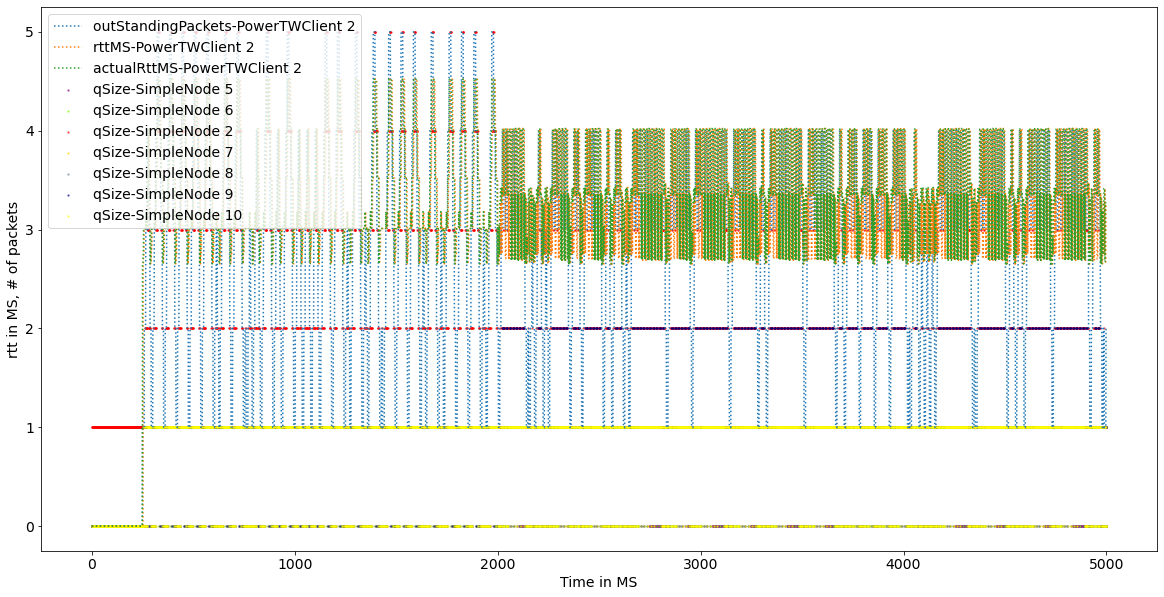

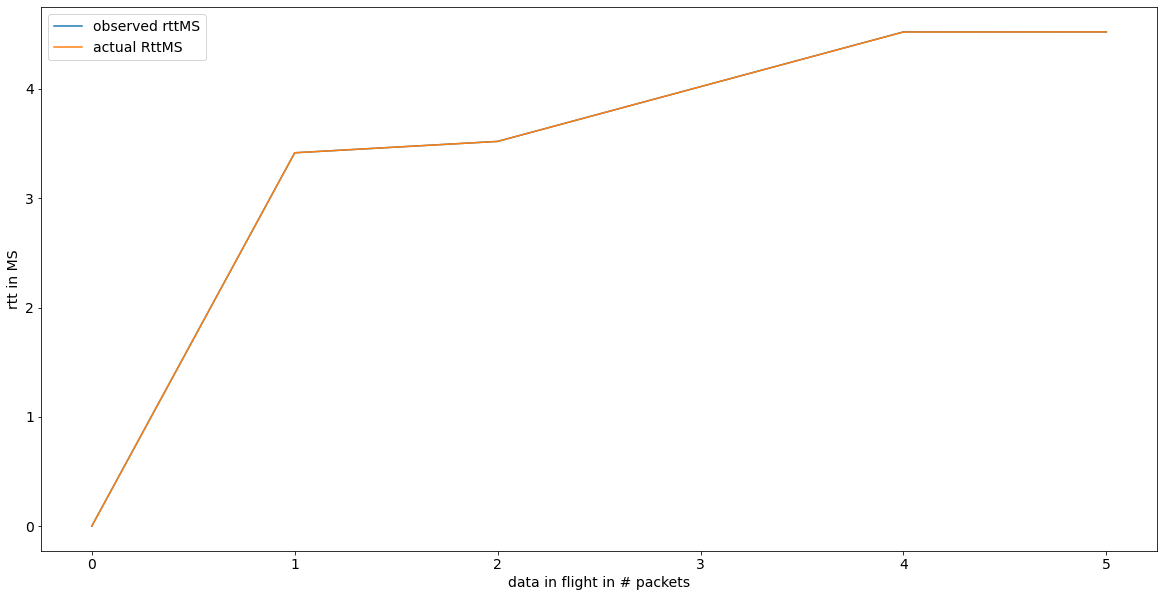

In [12]:

analyzer.createBinnedChartForNodeVsClient(nodes2, ['qSize'], [client2], ['outStandingPackets', 'rttMS', 'actualRttMS'], figsize=(20, 10), start=0, end=None, xlabel="Time in MS", ylabel="rtt in MS, # of packets")
analyzer.createPacketVsRTT(client2, figsize=(20, 10),)

In [13]:
client.stats['totalPacketsAcked'][-1], client2.stats['totalPacketsAcked'][-1]

(4998, 4056)

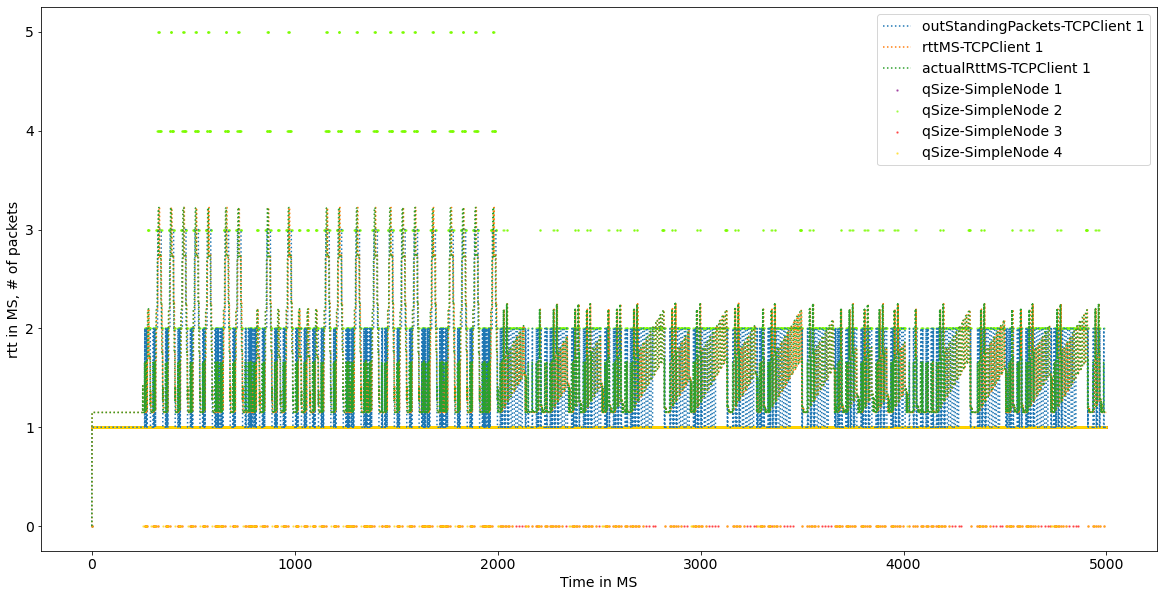

In [14]:

analyzer.createBinnedChartForNodeVsClient(nodes, ['qSize'], [client], ['outStandingPackets', 'rttMS', 'actualRttMS'], figsize=(20, 10), start=0, end=8000, xlabel="Time in MS", ylabel="rtt in MS, # of packets")

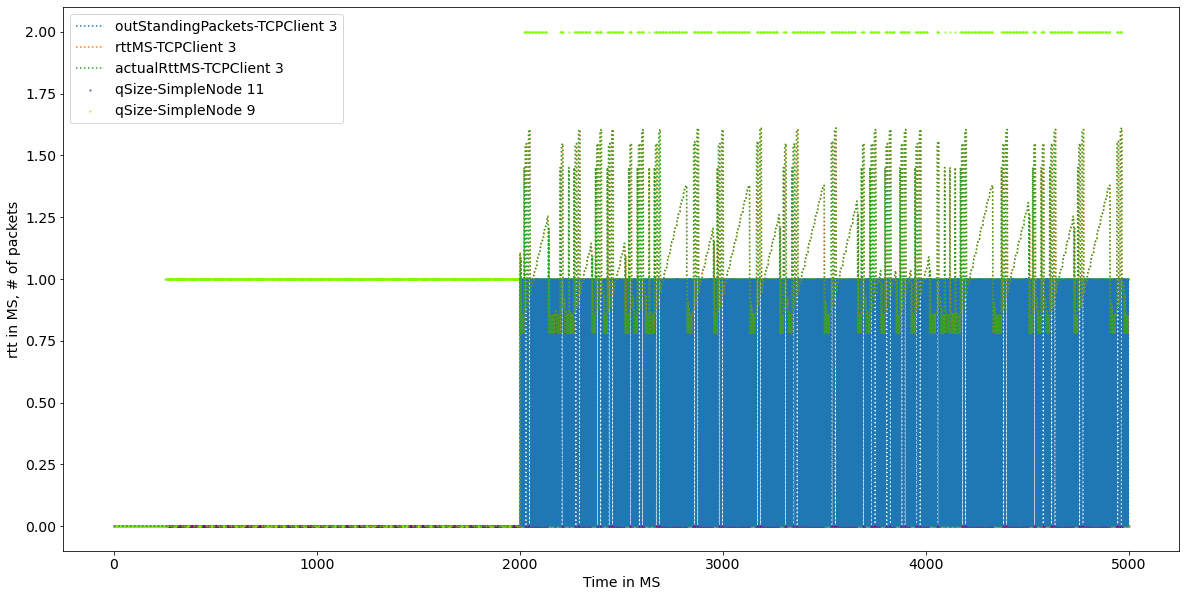

In [15]:
analyzer.createBinnedChartForNodeVsClient(nodes3, ['qSize'], [client3], ['outStandingPackets', 'rttMS', 'actualRttMS'], figsize=(20, 10), start=0, end=8000, xlabel="Time in MS", ylabel="rtt in MS, # of packets")

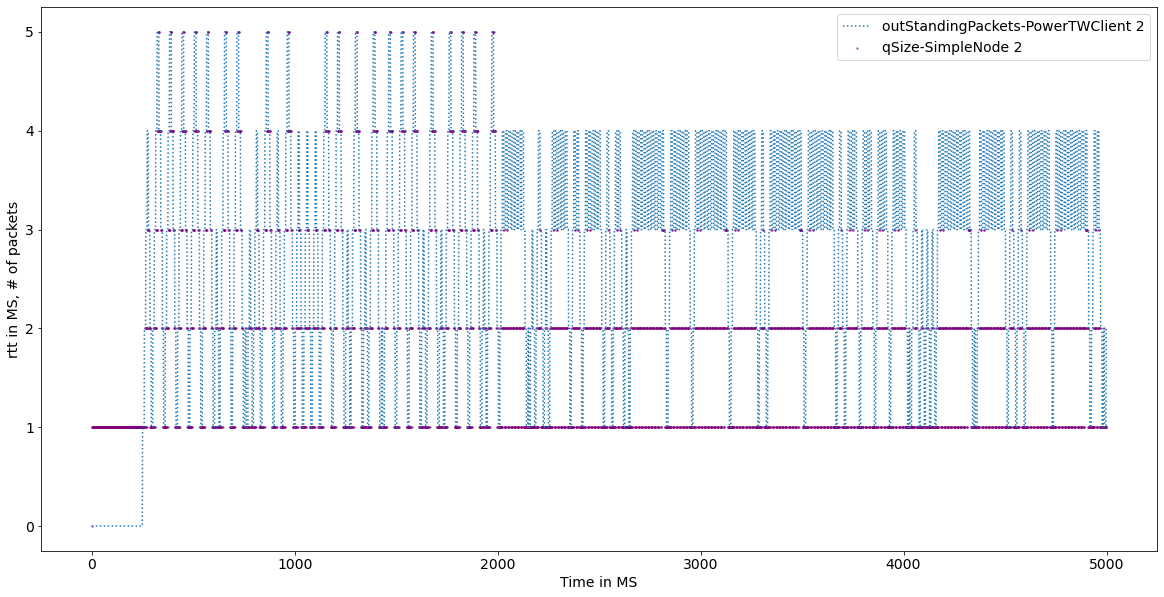

In [17]:

# filteredNodes = [nodes2[2], nodes2[5]]
filteredNodes = [nodes2[2]]
analyzer.createBinnedChartForNodeVsClient(filteredNodes, ['qSize'], [client2], ['outStandingPackets'], figsize=(20, 10), start=0, end=None, xlabel="Time in MS", ylabel="rtt in MS, # of packets")

In [ ]:

filteredNodes = [nodes2[2]]
analyzer.createBinnedChartForNodeVsClient(filteredNodes, ['qSize'], [client2], ['outStandingPackets', 'actualRttMS'], figsize=(20, 10), start=0, end=None, xlabel="Time in MS", ylabel="rtt in MS, # of packets")

In [ ]:
analyzer.createMovingAverageChartForNodeVsClient(filteredNodes, ['qSize'], [client2], ['outStandingPackets', 'actualRttMS', 'deliveryRateInS'], 
                                                 figsize=(20, 10), 
                                                 start=0, end=None, 
                                                 xlabel="Time in MS", ylabel="rtt in MS, # of packets", 
                                                 windowSize=100)